<a href="https://colab.research.google.com/github/buseacar/BuseTweet/blob/main/python_proje_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stok yetersiz


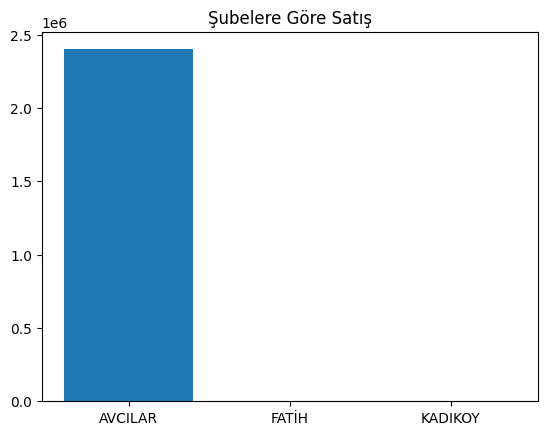

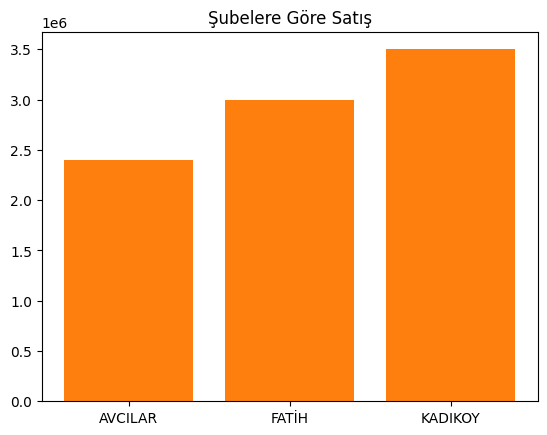

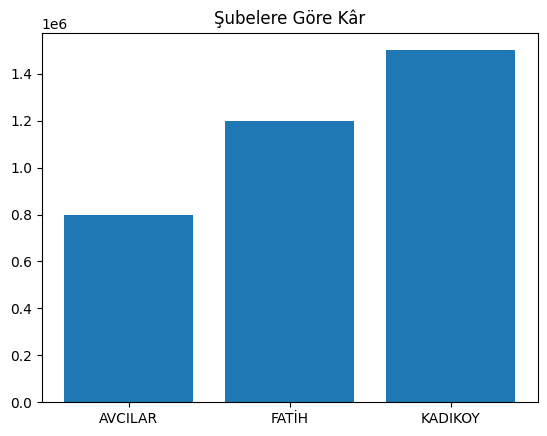

In [2]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
from datetime import datetime
import uuid

def tr_to_en(text):
    cevir = str.maketrans("çğıöşüÇĞİÖŞÜ", "cgiosuCGIOSU")
    return text.translate(cevir)

class AnaDepo:
    def __init__(self):
        self.stok = {
            "GELISIM_PHONE1": {"miktar": 170000, "maliyet": 100000},
            "GELISIM_PHONE2": {"miktar": 200000, "maliyet": 80000},
            "GELISIM_PHONE3": {"miktar": 400, "maliyet": 20000}
        }

    def urun_ver(self, urun, miktar):
        if self.stok[urun]["miktar"] >= miktar:
            self.stok[urun]["miktar"] -= miktar
            return True
        print("yeterli stok yok")
        return False

class Sube:
    def __init__(self, isim, enlem, boylam, yonetici):
        self.isim = tr_to_en(isim)
        self.yonetici = tr_to_en(yonetici)
        self.id = uuid.uuid4().hex[:8]
        self.konum = [enlem, boylam]
        self.stoklar = {}
        self.maliyetler = {}
        self.toplam_satis = 0
        self.toplam_kar = 0

    def stok_guncelle(self, urun, miktar, islem, fiyat):
        if islem == "Alış":
            self.stoklar[urun] = self.stoklar.get(urun, 0) + miktar
            self.maliyetler[urun] = fiyat

        elif islem == "Satış":
            if self.stoklar.get(urun, 0) >= miktar:
                self.stoklar[urun] -= miktar
                gelir = miktar * fiyat
                maliyet = miktar * self.maliyetler[urun]
                self.toplam_satis += gelir
                self.toplam_kar += (gelir - maliyet)
            else:
                print("Stok yetersiz")

        elif islem == "İade":
            self.stoklar[urun] += miktar
            gelir = miktar * fiyat
            maliyet = miktar * self.maliyetler[urun]
            self.toplam_satis -= gelir
            self.toplam_kar -= (gelir - maliyet)

    def rapor(self):
        return self.toplam_satis, self.toplam_kar

class GelisimElektronik:
    def __init__(self):
        self.depo = AnaDepo()
        self.subeler = {
            "AVCILAR": Sube("Avcılar", 40.9792, 28.7214, "Ayşe Yılmaz"),
            "FATİH": Sube("Fatih", 41.0203, 28.9339, "Nehir Avci"),
            "KADIKOY": Sube("Kadıköy", 40.9903, 29.0205, "Busenur Acar")
        }
        self.csv = "islem_kayitlari.csv"
        self.kayitlar = []

    def islem_yap(self, tarih, sube, urun, miktar, fiyat, islem):
        if islem == "Alış":
            if not self.depo.urun_ver(urun, miktar):
                return
        self.subeler[sube].stok_guncelle(urun, miktar, islem, fiyat)

        self.kayitlar.append({
            "tarih": tarih,
            "sube": sube,
            "urun": urun,
            "miktar": miktar,
            "fiyat": fiyat,
            "islem": islem
        })

    def csv_kaydet(self):
        pd.DataFrame(self.kayitlar).to_csv(self.csv, index=False)

    def grafikler(self):
        sube_isimleri = list(self.subeler.keys())
        satislar = [s.toplam_satis for s in self.subeler.values()]
        karlar = [s.toplam_kar for s in self.subeler.values()]

        plt.bar(sube_isimleri, satislar)
        plt.title("Şubelere Göre Satış")
        plt.savefig("satis.png")

        plt.figure()
        plt.bar(sube_isimleri, karlar)
        plt.title("Şubelere Göre Kâr")
        plt.savefig("kar.png")

    def harita(self):
        h = folium.Map(location=[41.0, 29.0], zoom_start=11)
        for s in self.subeler.values():
            folium.Marker(
                s.konum,
                popup=f"{s.isim}<br>Satış: {s.toplam_satis}<br>Kâr: {s.toplam_kar}"
            ).add_to(h)
        h.save("magazalar.html")

if __name__ == "__main__":
    sirket = GelisimElektronik()

    sirket.islem_yap("2025-12-24", "AVCILAR", "GELISIM_PHONE3", 50, 400000, "Alış")
    sirket.islem_yap("2025-12-25", "AVCILAR", "GELISIM_PHONE3", 5, 600000, "Satış")
    sirket.islem_yap("2025-12-26", "AVCILAR", "GELISIM_PHONE3", 1, 600000, "İade")

    sirket.csv_kaydet()
    sirket.grafikler()
    sirket.harita()


    sirket.islem_yap(
        tarih="2025-12-24",
        sube="FATİH",
        urun="GELISIM_PHONE2",
        miktar=30,
        fiyat=300000,
        islem="Alış"
    )

    sirket.islem_yap(
        tarih="2025-12-25",
        sube="FATİH",
        urun="GELISIM_PHONE2",
        miktar=7,
        fiyat=500000,
        islem="Satış"
    )

    sirket.islem_yap(
        tarih="2025-12-26",
        sube="FATİH",
        urun="GELISIM_PHONE2",
        miktar=1,
        fiyat=500000,
        islem="İade"
    )

    sirket.islem_yap(
        tarih="2025-12-24",
        sube="KADIKOY",
        urun="GELISIM_PHONE1",
        miktar=40,
        fiyat=200000,
        islem="Alış"
    )

    sirket.islem_yap(
        tarih="2025-12-25",
        sube="KADIKOY",
        urun="GELISIM_PHONE1",
        miktar=10,
        fiyat=350000,
        islem="Satış"
    )

    sirket.islem_yap(
        tarih="2025-12-27",
        sube="KADIKOY",
        urun="GELISIM_PHONE1",
        miktar=5000,   # stoktan fazla
        fiyat=350000,
        islem="Satış"
    )

    sirket.csv_kaydet()

    sirket.grafikler()
    sirket.harita()




